# Hands on session on Marketing and Social Media Analytics - June 3rd

# Introduction

## Model building – life cycle

The most important part before building any model is to understand the business problem first. We can then generate some hypothesis on how the problem can be solved. For instance, we can brain storm and list down factors that can influence the problem we are trying to solve. Next step is to extract data from relevant sources based on the generated hypothesis. In real life, data is never perfect. Hence, we need to perform data exploration to understand the data dynamics and perform cleaning so that the data is usable for model building. Most of the time is spent doing the above mentioned steps. Once the cleaning is complete, we can proceed to model building and deployment.

# HacKart

## Problem definition

HacKart is an e-commerce platform and has tried several marketing channels to increase its reach. This includes (but is not limited to) Google Adwords, Display campaigns, email marketing, TV adverts and Online events. Our aim is to help HacKart by creating an efficient email strategy for them.

When an email is sent to the user, one of the following outcomes is mapped to each email:

1. No action on the email - The email which was sent to the user was never opened. The email kept lying in the inbox or was classified as spam by the email service provider or was never opened. This outcome is denoted by email_status 0. 

2. Email Opened, but no further action - In these cases, the email was opened by the customer, but he did not take any further action with in 30 days of sending this email. This outcome is denoted by email_status 1.

3. Email opened and the person clicked on a product / link - In these cases, the person not only opened the email, they also clicked on one of the links present in the email. Some of these people will go on to buy the advertised products in future. This outcome is denoted by email_status 2. These are the potential customers for HacKart. If we can predict such customers, it will help HacKart make their business better.

## Hypothesis generation

List down some factors that can influence successful email campaign such as

1. Length of the email
2. Interesting subject of the email
3. Images etc.,

## Data collection

Hypothesis generation lays the path to extract and collate relevant data required for analysis. Usually, unification of data is a challenge when the data comes from multiple sources. Luckily, we have all the data collected for this problem. Please find the data in the current repository.

## Data exploration

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading data
train = pd.read_csv('Train_psolI3n.csv');print(train.shape)
test = pd.read_csv('Test_09JmpYa.csv');print(test.shape)

(68353, 12)
(45978, 11)


### We have approximately 68000 records in train and 45000 records in test. Let's inspect the data.

In [3]:
train.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [4]:
def get_overview(df):
    return pd.DataFrame({'Missing_values_count': df.isnull().sum(),
                         'Number_of_unique_values': df.apply(lambda x : len(pd.unique(x))),
                         'Data_type': df.dtypes})

In [5]:
train_overview = get_overview(train)
test_overview = get_overview(test)

In [6]:
train_overview

,Data_type,Missing_values_count,Number_of_unique_values
Email_ID,object,0,68353
Email_Type,int64,0,2
Subject_Hotness_Score,float64,0,51
Email_Source_Type,int64,0,2
Customer_Location,object,11595,8
Email_Campaign_Type,int64,0,3
Total_Past_Communications,float64,6825,65
Time_Email_sent_Category,int64,0,3
Word_Count,int64,0,151
Total_Links,float64,2201,38


In [7]:
test_overview

,Data_type,Missing_values_count,Number_of_unique_values
Email_ID,object,0,45978
Email_Type,int64,0,2
Subject_Hotness_Score,float64,0,51
Email_Source_Type,int64,0,2
Customer_Location,object,7843,9
Email_Campaign_Type,int64,0,3
Total_Past_Communications,float64,4690,65
Time_Email_sent_Category,int64,0,3
Word_Count,int64,0,151
Total_Links,float64,1423,38


### Key points and insights to note:

1. Customer location has the highest number of missing values. Also, train data contains data from 8 unique locations and test data contains data from 9 unique locations. DISASTER! We were about to test the model on which it has never seen. We will see how to handle this case in data cleaning part.

2. Email_Status is the target variable and hence not present in test (obviously!). This is a 3 class classification problem.

3. We may use email_type to fill the missing values in Total_links and Total_images

## Univariate analysis and bivariate analysis

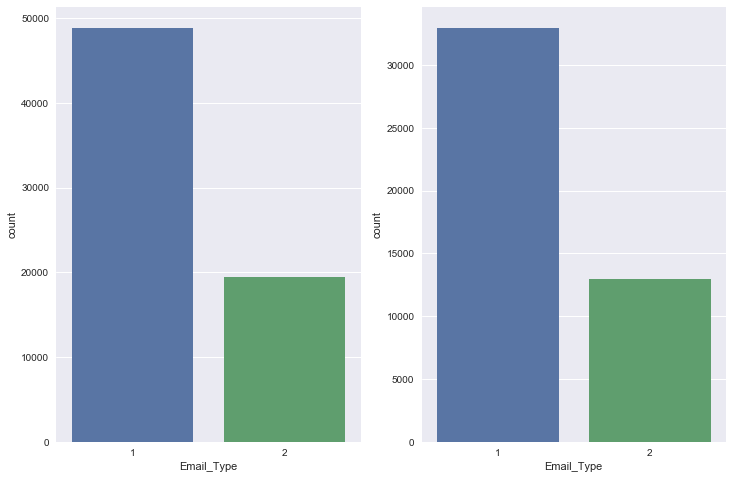

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.countplot(train['Email_Type'])
plt.subplot(1, 2, 2)
sns.countplot(test['Email_Type'])

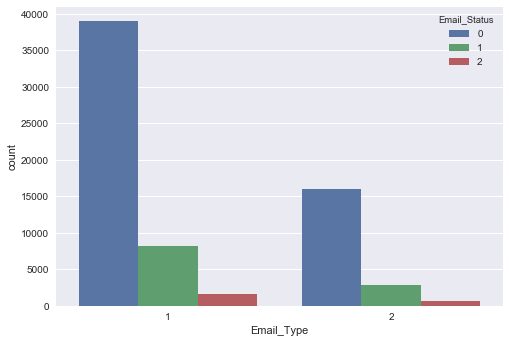

In [9]:
sns.countplot(train['Email_Type'], hue=train['Email_Status'])

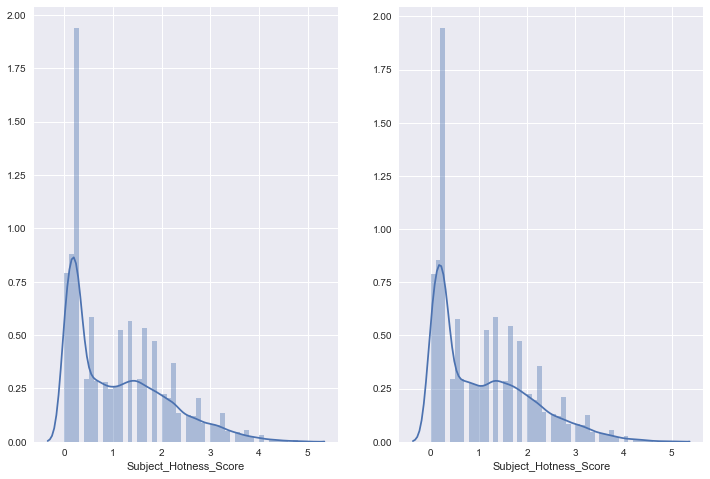

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.distplot(train['Subject_Hotness_Score'])
plt.subplot(1, 2, 2)
sns.distplot(test['Subject_Hotness_Score'])

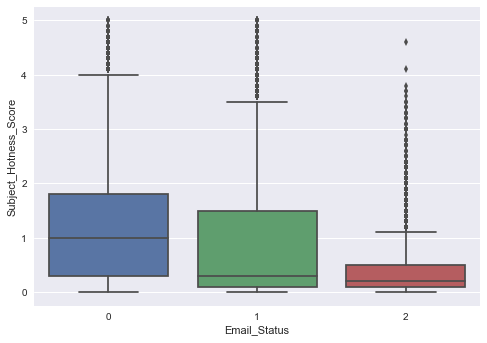

In [11]:
sns.boxplot(x=train['Email_Status'], y=train['Subject_Hotness_Score'])

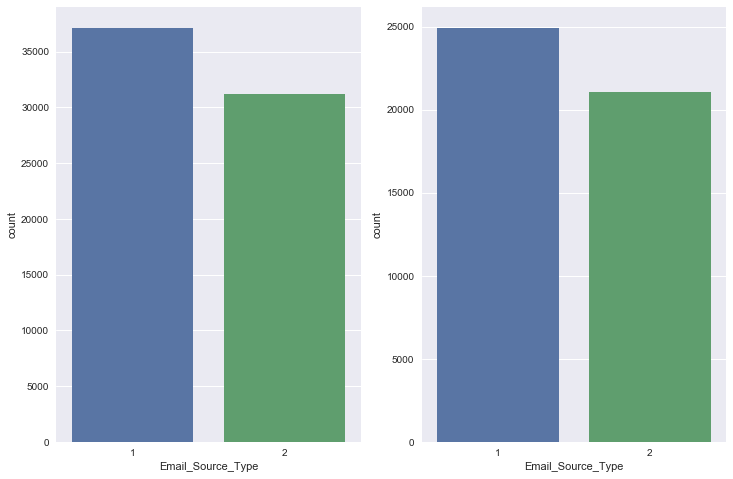

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.countplot(train['Email_Source_Type'])
plt.subplot(1, 2, 2)
sns.countplot(test['Email_Source_Type'])

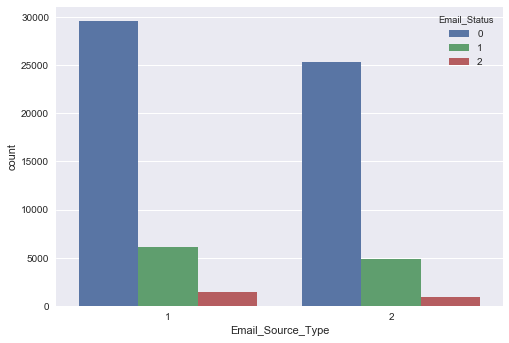

In [13]:
sns.countplot(train['Email_Source_Type'], hue=train['Email_Status'])

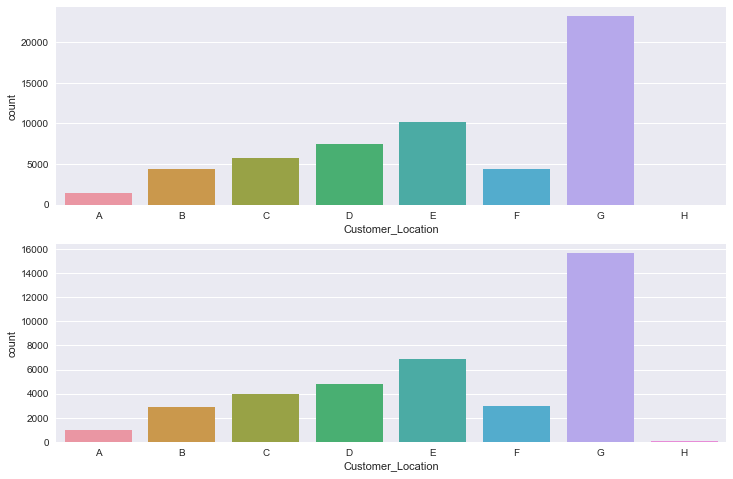

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
sns.countplot(train['Customer_Location'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.subplot(2, 1, 2)
sns.countplot(test['Customer_Location'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

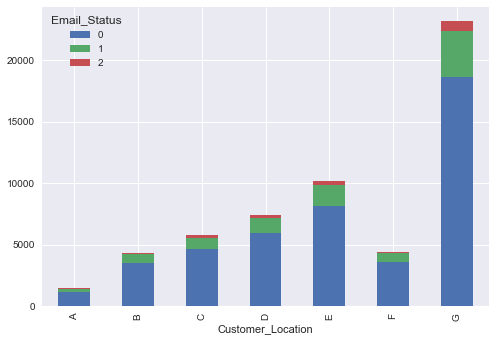

In [15]:
pd.crosstab(train['Customer_Location'], train['Email_Status']).plot(kind='bar', stacked=True)

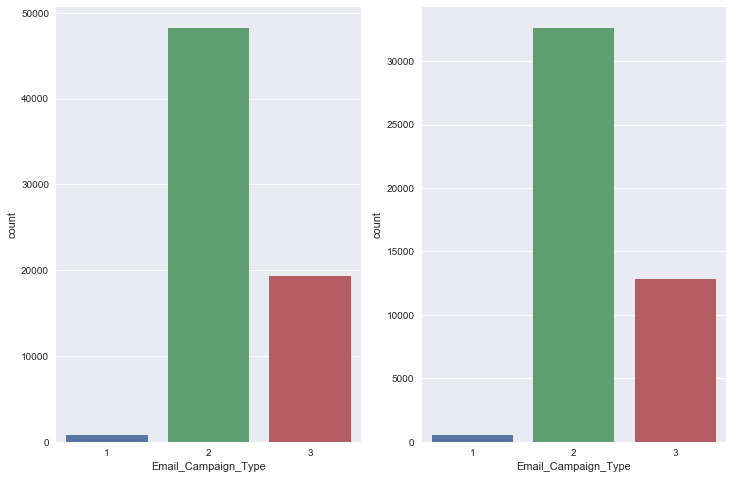

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.countplot(train['Email_Campaign_Type'])
plt.subplot(1, 2, 2)
sns.countplot(test['Email_Campaign_Type'])

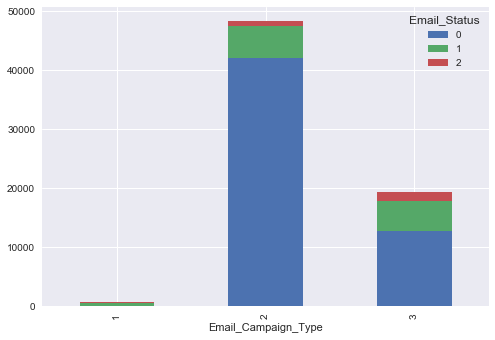

In [17]:
pd.crosstab(train['Email_Campaign_Type'], train['Email_Status']).plot(kind='bar', stacked=True)

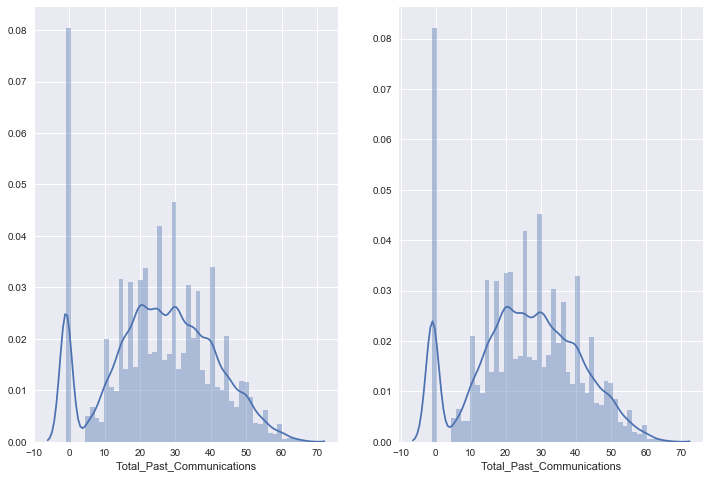

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.distplot(train['Total_Past_Communications'].fillna(-1))
plt.subplot(1, 2, 2)
sns.distplot(test['Total_Past_Communications'].fillna(-1))

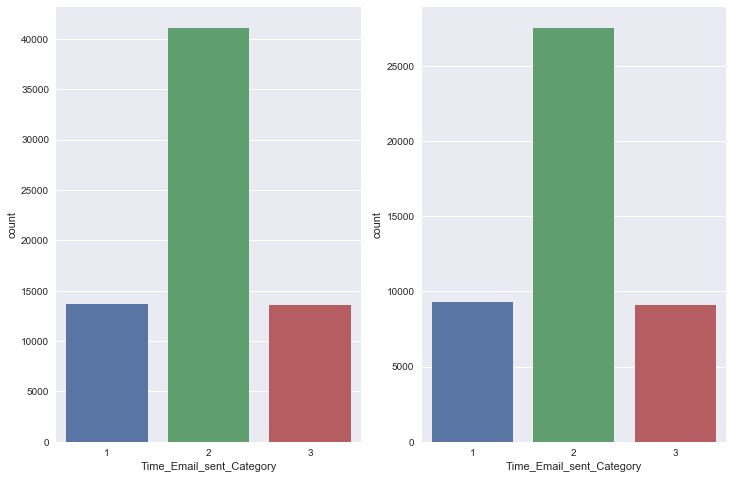

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.countplot(train['Time_Email_sent_Category'])
plt.subplot(1, 2, 2)
sns.countplot(test['Time_Email_sent_Category'])

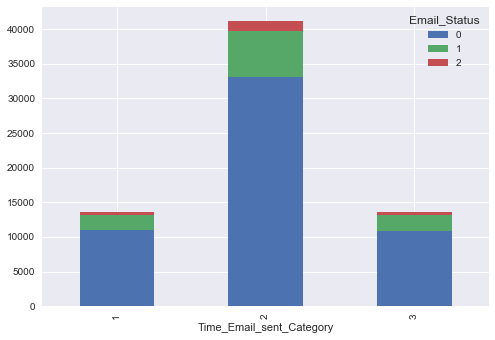

In [20]:
pd.crosstab(train['Time_Email_sent_Category'], train['Email_Status']).plot(kind='bar', stacked=True)

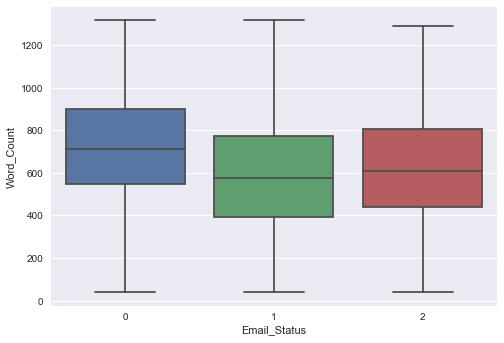

In [21]:
sns.boxplot(x=train['Email_Status'], y=train['Word_Count'])

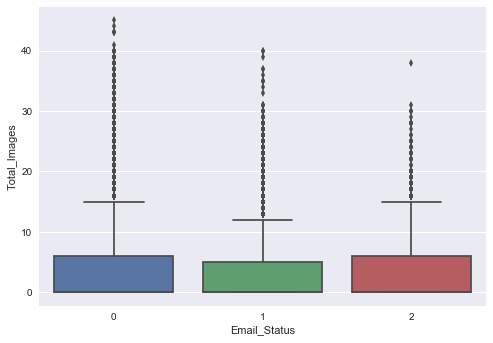

In [22]:
sns.boxplot(x=train['Email_Status'], y=train['Total_Images'])

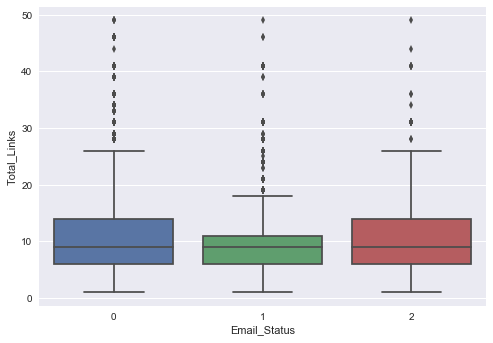

In [23]:
sns.boxplot(x=train['Email_Status'], y=train['Total_Links'])

In [24]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)

In [25]:
email_type_avg_links = data.pivot_table(values='Total_Links', index='Email_Type')
email_type_avg_links = email_type_avg_links.reset_index(drop=False)
miss_bool = data['Total_Links'].isnull() 
print('Original #missing: {}'.format(sum(miss_bool)))
data.loc[miss_bool,'Total_Links'] = data.loc[miss_bool,'Email_Type'].apply(lambda x: email_type_avg_links.loc[email_type_avg_links['Email_Type'] == 2, 'Total_Links'].values[0])
print('Final #missing: {}'.format(sum(data['Total_Links'].isnull())))

Original #missing: 3624
Final #missing: 0


In [26]:
email_type_avg_images = data.pivot_table(values='Total_Images', index='Email_Type')
email_type_avg_images = email_type_avg_images.reset_index(drop=False)
miss_bool = data['Total_Images'].isnull() 
print('Original #missing: {}'.format(sum(miss_bool)))
data.loc[miss_bool,'Total_Images'] = data.loc[miss_bool,'Email_Type'].apply(lambda x: email_type_avg_images.loc[email_type_avg_images['Email_Type'] == 2, 'Total_Images'].values[0])
print('Final #missing: {}'.format(sum(data['Total_Images'].isnull())))

Original #missing: 2770
Final #missing: 0


In [27]:
data['Total_Past_Communications'] = data['Total_Past_Communications'].fillna(np.mean(data['Total_Past_Communications']))

In [28]:
# Removing Location H from test data
data.loc[data['Customer_Location'] == 'H', 'Customer_Location'] = np.nan
# Filling the empty values with mode location
data['Customer_Location'] = data['Customer_Location'].fillna(data.mode()['Customer_Location'][0])

## Modelling

In [29]:
get_overview(data)

,Data_type,Missing_values_count,Number_of_unique_values
Customer_Location,object,0,7
Email_Campaign_Type,int64,0,3
Email_ID,object,0,114331
Email_Source_Type,int64,0,2
Email_Status,float64,45978,4
Email_Type,int64,0,2
Subject_Hotness_Score,float64,0,51
Time_Email_sent_Category,int64,0,3
Total_Images,float64,0,47
Total_Links,float64,0,38


### We need to encode(dummify) "Customer_Location", "Email_Campaign_Type", "Time_Email_sent_Category"

In [30]:
final_train = data[data['source'] == 'train'].reset_index(drop=True)
final_test = data[data['source'] == 'test'].reset_index(drop=True)

In [31]:
columns_to_dummify = ["Email_Campaign_Type", "Time_Email_sent_Category"]

In [32]:
final_train = pd.get_dummies(final_train, columns=columns_to_dummify)
final_test = pd.get_dummies(final_test, columns=columns_to_dummify)

In [33]:
final_train.columns.values

array(['Customer_Location', 'Email_ID', 'Email_Source_Type',
       'Email_Status', 'Email_Type', 'Subject_Hotness_Score',
       'Total_Images', 'Total_Links', 'Total_Past_Communications',
       'Word_Count', 'source', 'Email_Campaign_Type_1',
       'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_1', 'Time_Email_sent_Category_2',
       'Time_Email_sent_Category_3'], dtype=object)

In [34]:
cols_for_model = np.setdiff1d(final_train.columns.values, ['Customer_Location', 'Email_ID', 'Email_Status', 'source'])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [36]:
def score(clf, random_state = 0):
    kf = StratifiedKFold(5, shuffle=True, random_state=random_state)
    acc = 0.0
    for itrain, itest in kf.split(final_train[cols_for_model], final_train['Email_Status']):
        Xtr, Xte = final_train.loc[itrain, cols_for_model], final_train.loc[itest, cols_for_model]
        ytr, yte = final_train.loc[itrain, 'Email_Status'], final_train.loc[itest, 'Email_Status']
        clf.fit(Xtr, ytr)
        preds = clf.predict(Xte)
        acc = acc + accuracy_score(yte, preds)
    return acc/5.0

0.81008882663


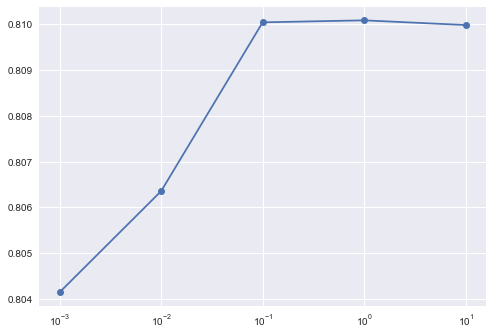

In [37]:
Cs = np.logspace(-3,1,5)
res = []
for C in Cs:
    res.append(score(LogisticRegression(C = C)))
plt.semilogx(Cs, res,'-o');
print(max(res))

### Optimal C seems to occur at 0.1

In [38]:
clf_lr = LogisticRegression(C=0.1)

In [39]:
clf_lr.fit(final_train[cols_for_model], final_train['Email_Status'])

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
preds = clf_lr.predict(final_test[cols_for_model])

In [41]:
submit = pd.DataFrame({'Email_ID': final_test['Email_ID'], 'Email_Status': preds.astype(int)})

In [42]:
submit.head()

,Email_ID,Email_Status
0,EMA00081000168000,0
1,EMA00081000187610,0
2,EMA00081000244770,0
3,EMA00081000245260,0
4,EMA00081000264690,0
